## Лабораторная работа 3. Визуализация данных. Метод опорных векторов. 

Постарайтесь оформить всю работу как один монолитный рассказ/отчет. Избегайте дублирования кода. Избегайте использования циклов, вместо этого ищите готовый алгоритм в пакетах. Подписывайте все графики, а также их оси, если график содержит несколько кривых, то обязательно пользуйтесь легендой. Также неукоснительно соблюдайте PEP8. За несоблюдение этих простейших правил итоговые баллы могут быть снижены безапелляционно.

<h3 align="center"> Запустите следующую ячейку первой </h3>

Numpy, Pandas и Matplotlib используются в обеих частях работы, так что без них никак :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

### 1. (8 баллов) Pandas and data visualization

![](https://imgs.xkcd.com/comics/convincing.png)

В этом задании вы будете работать с данными из файла ```articles.csv```.

### Решения

**1. (1 балл)** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).

In [2]:
df = pd.read_csv("./articles.csv")
df.head()

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017,4,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017,1,"SEOUL, South Korea — North Korea’s leader, ..."


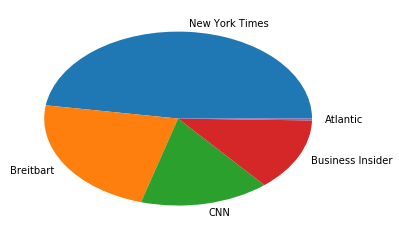

In [3]:
publishers = df["publication"].unique()
amounts = df["publication"].value_counts()
plt.pie(amounts, labels=publishers)
plt.show()

**2. (2 балла)** Постройте распределение колличества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

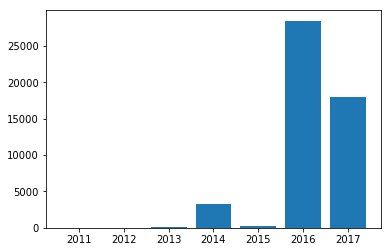

In [4]:
years = df["year"].unique()
amounts = df["year"].value_counts()
plt.bar(years, amounts, tick_label=years)
plt.show()

Больше всего публикаций было в 2016 году (около 28 тысяч).

**3. (3 балла)** Опредилите топ-10 авторов для года с наибольшим количеством публикаций (обратите внимание, что у некоторых статей несколько авторов - это нужно учитывать).

**4. (2 балла)** Постройте распределение количества публикаций авторов из предыдущего задания по месяцам, используя [hist plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-hist).

### 2. (12 баллов) Sklearn and support vector machine

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/06/10945756_10202550638602268_6848260291113352290_n.jpg)

В этом задании вы будете работать с данными из репозитория UCI. Датасет называется [YouTube Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection). На этом датасете вы будете решать задачу определения спама по комментарию к видео-ролику на Youtube.


### Все import-ы для этой секции

In [ ]:
import os
import pandas as pd

import datetime

from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

### Решения

**1. (2 балла)** Скачайте данные из репозитория UCI (не меняйте названия исходных датасетов!). Объедените все пять таблиц в одну, добавив колонку ```'CLIP'``` с именем исполнителя в клипе. Выведите основную статистику датасета, ответив на вопросы: 
* топ5 самых коротких/длинных комментариев? 
* каково распределение между классами? 
* сколько уникальных авторов комментариев в данных?

In [ ]:
dataset_folder = "." + os.sep + "YouTube-Spam-Collection-v1"

df = pd.DataFrame()

for dataset_file in os.listdir(dataset_folder):
    if dataset_file.endswith(".csv"):
        this_df = pd.read_csv(dataset_folder + os.sep + dataset_file, sep=",")
        this_df["CLIP"] = dataset_file[dataset_file.index("-")+1:-4]
        df = df.append(this_df)

#### _Датасет в целом_

In [ ]:
df.head()

#### _Самые длинные и короткие комментарии_

#### _Распределение между классами_

Цифрами:

In [ ]:
df["CLASS"].value_counts()

Картинкой:

In [ ]:
amounts = df["CLASS"].value_counts()
plt.pie(amounts, labels=df["CLASS"].unique())
plt.show()

#### _Уникальные авторы комментариев_

In [ ]:
len(df["AUTHOR"].unique())

**2. (2 балла)** Перед тем как воспользоваться методом главных компонент на текстовых данных, их надо преобразовать в числовые. В этом задании вам предется самим разобраться с простой векторной моделью ```bag of words```. В этом вам помогут ссылки [wiki](https://en.wikipedia.org/wiki/Bag-of-words_model), [stackoverflow](https://stackoverflow.com/questions/44083683/countvectorizer-with-pandas-dataframe), [github](https://gist.github.com/kovid-rathee/3bdd9334409d583e6ee6430b8e45516d). Создайте векторное представление колонки ```'CONTENT'```, для этого используйте [sklearn.feature_extraction.text.CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). В конструкторе задайте параметры ```lowercase=True```, ```stop_words='english'```. Полученное преобразование занесите в переменную `X`. Также отделите от исходного датафрейма целевую метку класса в переменную `y`. Разбейте данные на обучающую и тестовую выборки в отношении `7:3`, добавьте суффиксы `train` и `test` соответственно к переменным `X` и `y`.

In [ ]:
# from sklearn.feature_extraction import text.CountVectorizer as CV
count_vectorizer = CV(lowercase=True, stop_words='english')

X = count_vectorizer.fit_transform(df["CONTENT"].values)
y = df["CLASS"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

**3. (4 балла)** Обучите метод опорных векторов с различными гиперпараметрами на данных полученных в предыдущем задании. Для этого используйте класс [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) с общим параметром `class_weight='balanced'`. Для перебора параметров используйте [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с параметрами `cv=5`, `scoring='accuracy'`. Используйте разные ядра:

- `kernel='linear'`, `C=[1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000]`
- `kernel='rbf'`, `C=[...]`, `gamma=['auto', 1.e-4, 1.e-3, 1.e-2, 1.e-2]`
- `kernel='poly'`, `C=[...]`, `degree=[2, 3, 5, 11]`

Ответьте на вопросы. Для каких гиперпараметров модели получились переобученными? Модели с каким ядром работают хуже/лучше? Как вы думаете почему?

Выберите лучшую модель и ответьте на вопросы. Сколько опорных векторов в модели? Выведите комментарии, соответствующие опорным векторам-нарушителям, граничным опорным векторам. Для тестовых данных найдите комментарии с наибольшим и наименьшим отступом от разделяющей гиперплоскости. Объясните почему получаются такие результаты. Найдите топ10 слов наиболее голосующих за спамные комментарии. Также объясните почему получаются такие результаты.

In [ ]:
linear_svc = SVC(class_weight="balanced", kernel="linear")
rbf_svc = SVC(class_weight="balanced", kernel="rbf")
poly_svc = SVC(class_weight="balanced", kernel="poly")

In [ ]:
linear_params = {"C": [1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000]}
rbf_params = {"C": [1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000], 
              "gamma": ['auto', 1.e-4, 1.e-3, 1.e-2, 1.e-2]}
poly_params = {"C": [1.e-4, 1.e-3, 1.e-2, 1.e-1, 1, 2, 10, 50, 100, 1000],
               "degree": [2, 3, 5, 11]}

#### **Линейное ядро**

In [ ]:
grid_searcher = GridSearchCV(linear_svc, linear_params, cv=5, scoring="accuracy")
grid_searcher.fit(X_train, y_train)
grid_searcher.best_score_

#### **RBF ядро**

In [ ]:
grid_searcher = GridSearchCV(rbf_svc, rbf_params, cv=5, scoring="accuracy")
grid_searcher.fit(X_train, y_train)
grid_searcher.best_score_

#### **Полиномиальное ядро**

In [ ]:
grid_searcher = GridSearchCV(poly_svc, poly_params, cv=5, scoring="accuracy")
grid_searcher.fit(X_train, y_train)
grid_searcher.best_score_

**4. (2 балла)** В прошлом задании мы учитывали только сам комментарий для классификации и не учитывали другую информацию из исходной таблицы. Добавьте новые признаки: ``'YEAR'``, ``'MONTH'``, `'DAY'` - в качестве вещественных признаков; `'CLIP'` - в качестве категориального признака, используя `one-hot encoding`; `'AUTHOR'` - в рамках модели `bag of words`. Обучите на новых данных метод опорных векторов с гиперпараметрами лучшего классификатора предыдущего задания. Ответьте на вопросы. Как изменились результаты? Как вы думаете почему?

In [ ]:
df["AUTHOR_VECT"] = count_vectorizer.fit_transform(df["AUTHOR"])

**5. (2 балла)** Давайте будем решать другую задачу на этих же данных. Научимся предсказывать клип по комментарию к нему. Теперь целевая переменная `y` - это столбец `'CLIP'` исходных данных, а `X` такой же как и в задании 2. Повторите численный эксперимент заданий 2 и 3 для новой задачи. Выберите лучшую модель. Отличается ли качество решения двух разных задач для одних и тех же данных для обучения? Как вы думаете почему? 

### 3. (10 баллов) Бонусное задание

![](http://blog.adnanmasood.com/wp-content/uploads/2015/06/joke1.png)

Покажите этим ребятам силу лингвистов, решив следующую задачу:)

**1. (10 баллов)** Классический линейный метод опорных векторов приводит к задаче квадратичного программирования:

\begin{cases}
\dfrac{1}{2}||w||^2 + C \sum_{i=1}^{l}\xi_i \to \min_{w, \xi} \\
y_i \langle w, x_i \rangle \geq 1 - \xi_i, \ \forall i=1\dots l \\
xi_i\geq0,  \ \forall i=1\dots l
\end{cases}

Какую функцию потерь оптимизирует линейный метод опорных векторов, если задачу свести к безусловной оптимизации регуляризованной функции потерь? Постройте задачу квадратичного программирования аналогичную SVM, но для оптимизации регуляризованной функции потерь вида:
\begin{cases}
(M-1)^2, \ M < 1 \\
0, M\geq1
\end{cases}
Выпишите двойственную к ней задачу.